In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

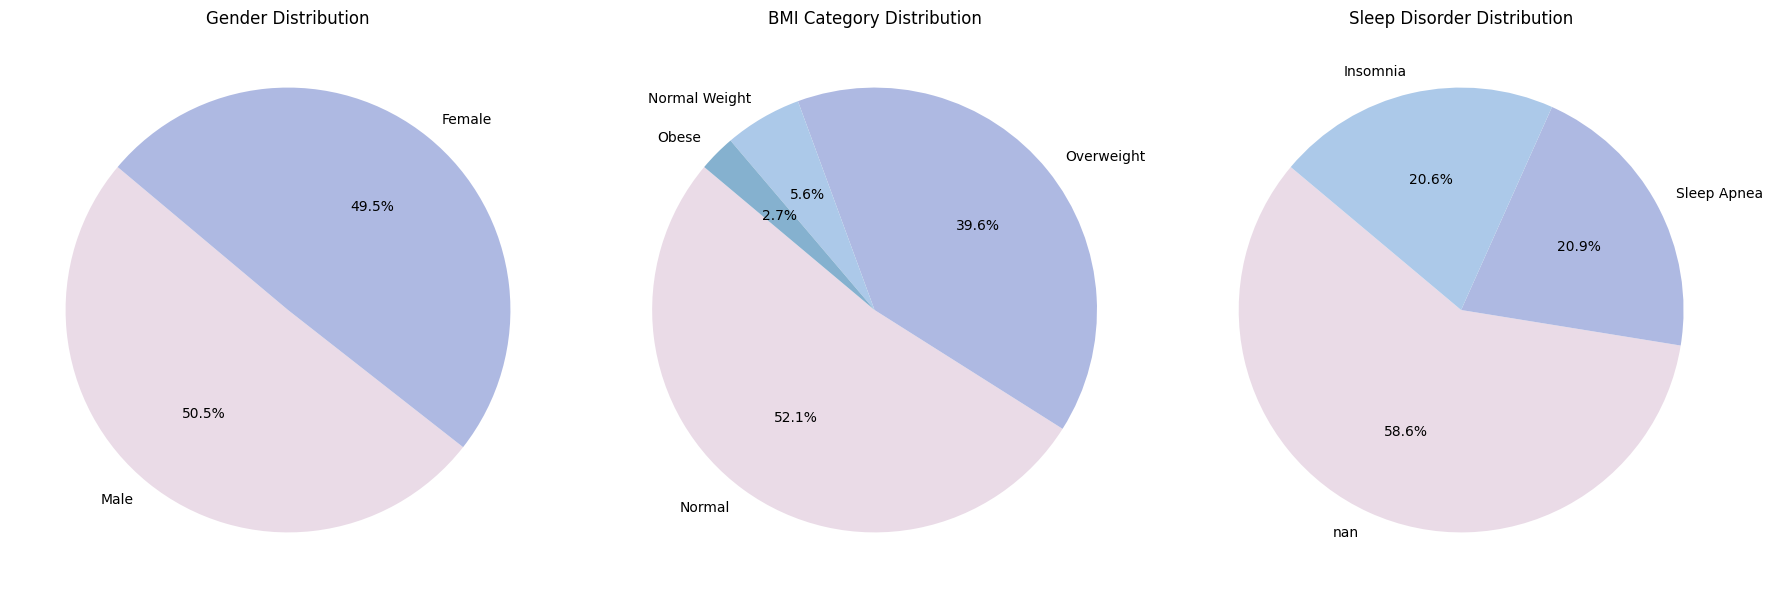

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 讀取資料
file_path = 'Sleep_health_and_lifestyle_dataset.csv'
df = pd.read_csv(file_path)

# 設定英文字型
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 年齡分組
bins = [0, 29, 39, 49, 59, 100]
labels = ['<30', '30-39', '40-49', '50-59', '60+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# ------------------------
# 先單獨畫 Gender 圓餅圖

# 建立 1列3欄的大畫布
fig, axes = plt.subplots(1, 3, figsize=(18, 6))



colors = ['#eadbe7', '#aeb9e2', '#acc9e9', '#85b1cf', '#f2ddb3']
gender_counts = df['Gender'].value_counts()
axes[0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
axes[0].set_title('Gender Distribution')

bmi_counts = df['BMI Category'].value_counts()
axes[1].pie(bmi_counts, labels=bmi_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
axes[1].set_title('BMI Category Distribution')

sleep_disorder_counts = df['Sleep Disorder'].value_counts(dropna=False)
axes[2].pie(sleep_disorder_counts, labels=sleep_disorder_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
axes[2].set_title('Sleep Disorder Distribution')

plt.tight_layout()
plt.show()


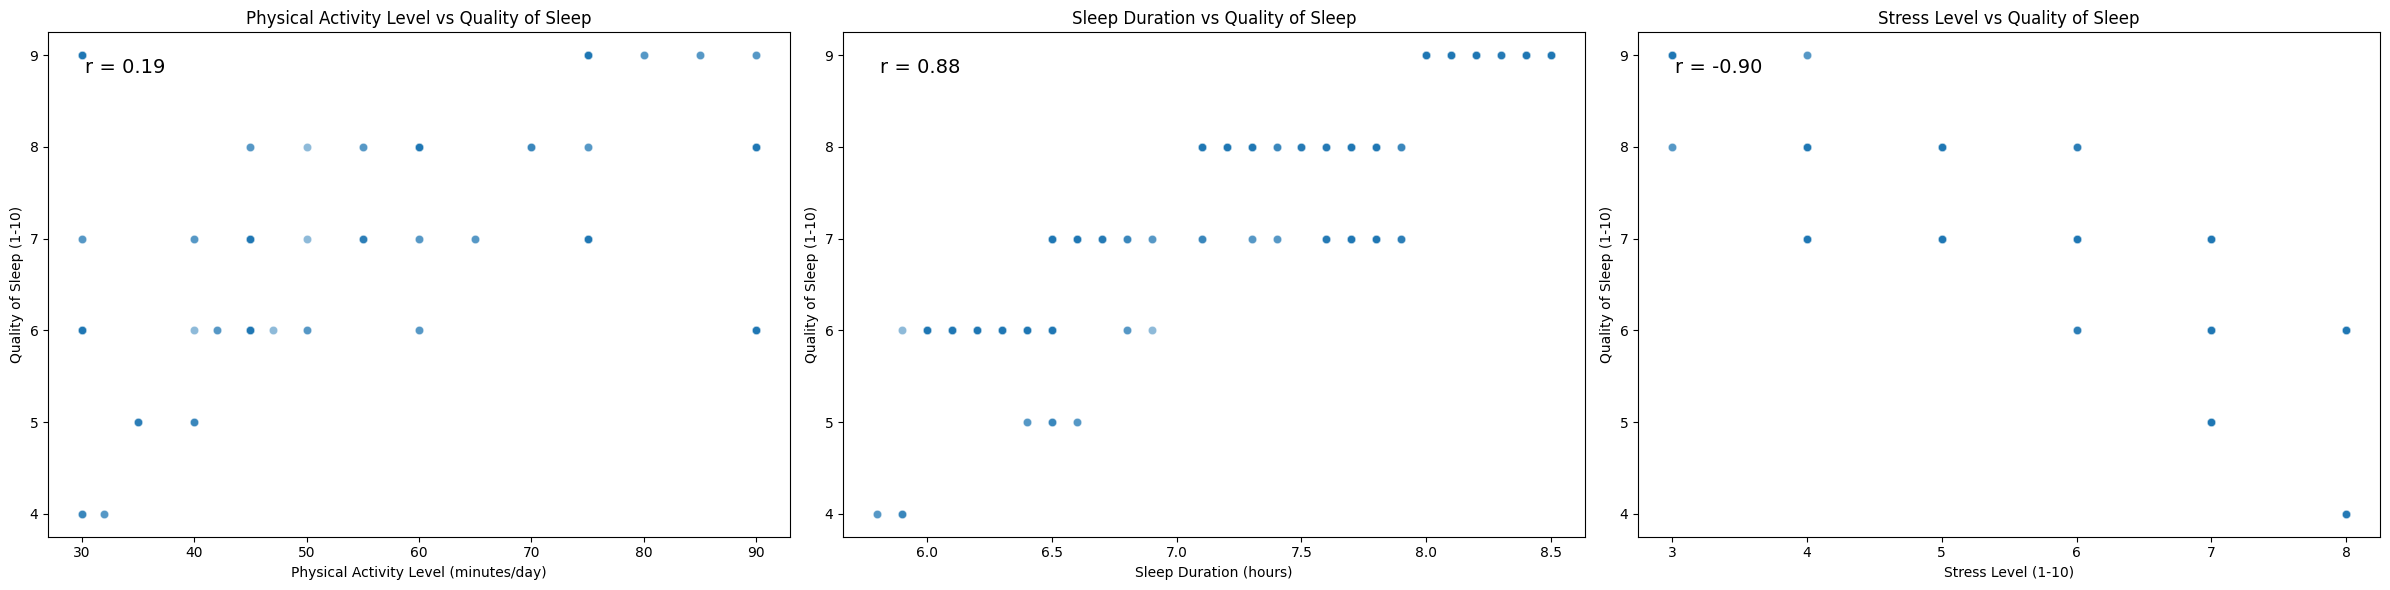

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# 建立 1列3欄的大畫布
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# Physical Activity Level vs Quality of Sleep
r, p = pearsonr(df['Physical Activity Level'], df['Quality of Sleep'])
axes[0].text(0.05, 0.95, f'r = {r:.2f}', transform=axes[0].transAxes, fontsize=14, verticalalignment='top')
sns.scatterplot(x='Physical Activity Level', y='Quality of Sleep', data=df, ax=axes[0], alpha=0.5)
axes[0].set_title('Physical Activity Level vs Quality of Sleep')
axes[0].set_xlabel('Physical Activity Level (minutes/day)')
axes[0].set_ylabel('Quality of Sleep (1-10)')

# Sleep Duration vs Quality of Sleep
r, p = pearsonr(df['Sleep Duration'], df['Quality of Sleep'])
axes[1].text(0.05, 0.95, f'r = {r:.2f}', transform=axes[1].transAxes, fontsize=14, verticalalignment='top')
sns.scatterplot(x='Sleep Duration', y='Quality of Sleep', data=df, ax=axes[1], alpha=0.5)
axes[1].set_title('Sleep Duration vs Quality of Sleep')
axes[1].set_xlabel('Sleep Duration (hours)')
axes[1].set_ylabel('Quality of Sleep (1-10)')

# Stress Level vs Quality of Sleep
r, p = pearsonr(df['Stress Level'], df['Quality of Sleep'])
axes[2].text(0.05, 0.95, f'r = {r:.2f}', transform=axes[2].transAxes, fontsize=14, verticalalignment='top')
sns.scatterplot(x='Stress Level', y='Quality of Sleep', data=df, ax=axes[2], alpha=0.5)
axes[2].set_title('Stress Level vs Quality of Sleep')
axes[2].set_xlabel('Stress Level (1-10)')
axes[2].set_ylabel('Quality of Sleep (1-10)')

# 排版
plt.tight_layout()
plt.show()


C:\Users\yuchu\AppData\Local\Temp\ipykernel_28892\2213159959.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='BMI Category', y='Sleep Duration', data=df, ax=axes[0, 1], palette=colors)
C:\Users\yuchu\AppData\Local\Temp\ipykernel_28892\2213159959.py:15: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.boxplot(x='BMI Category', y='Sleep Duration', data=df, ax=axes[0, 1], palette=colors)
C:\Users\yuchu\AppData\Local\Temp\ipykernel_28892\2213159959.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['Sleep Duration'], kde=True, bins=10, ax=axes[1,0], palette=colors)
C:\Users\yuchu\AppData\Local\Temp\ipykernel_28892\2213159959.py:31: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an

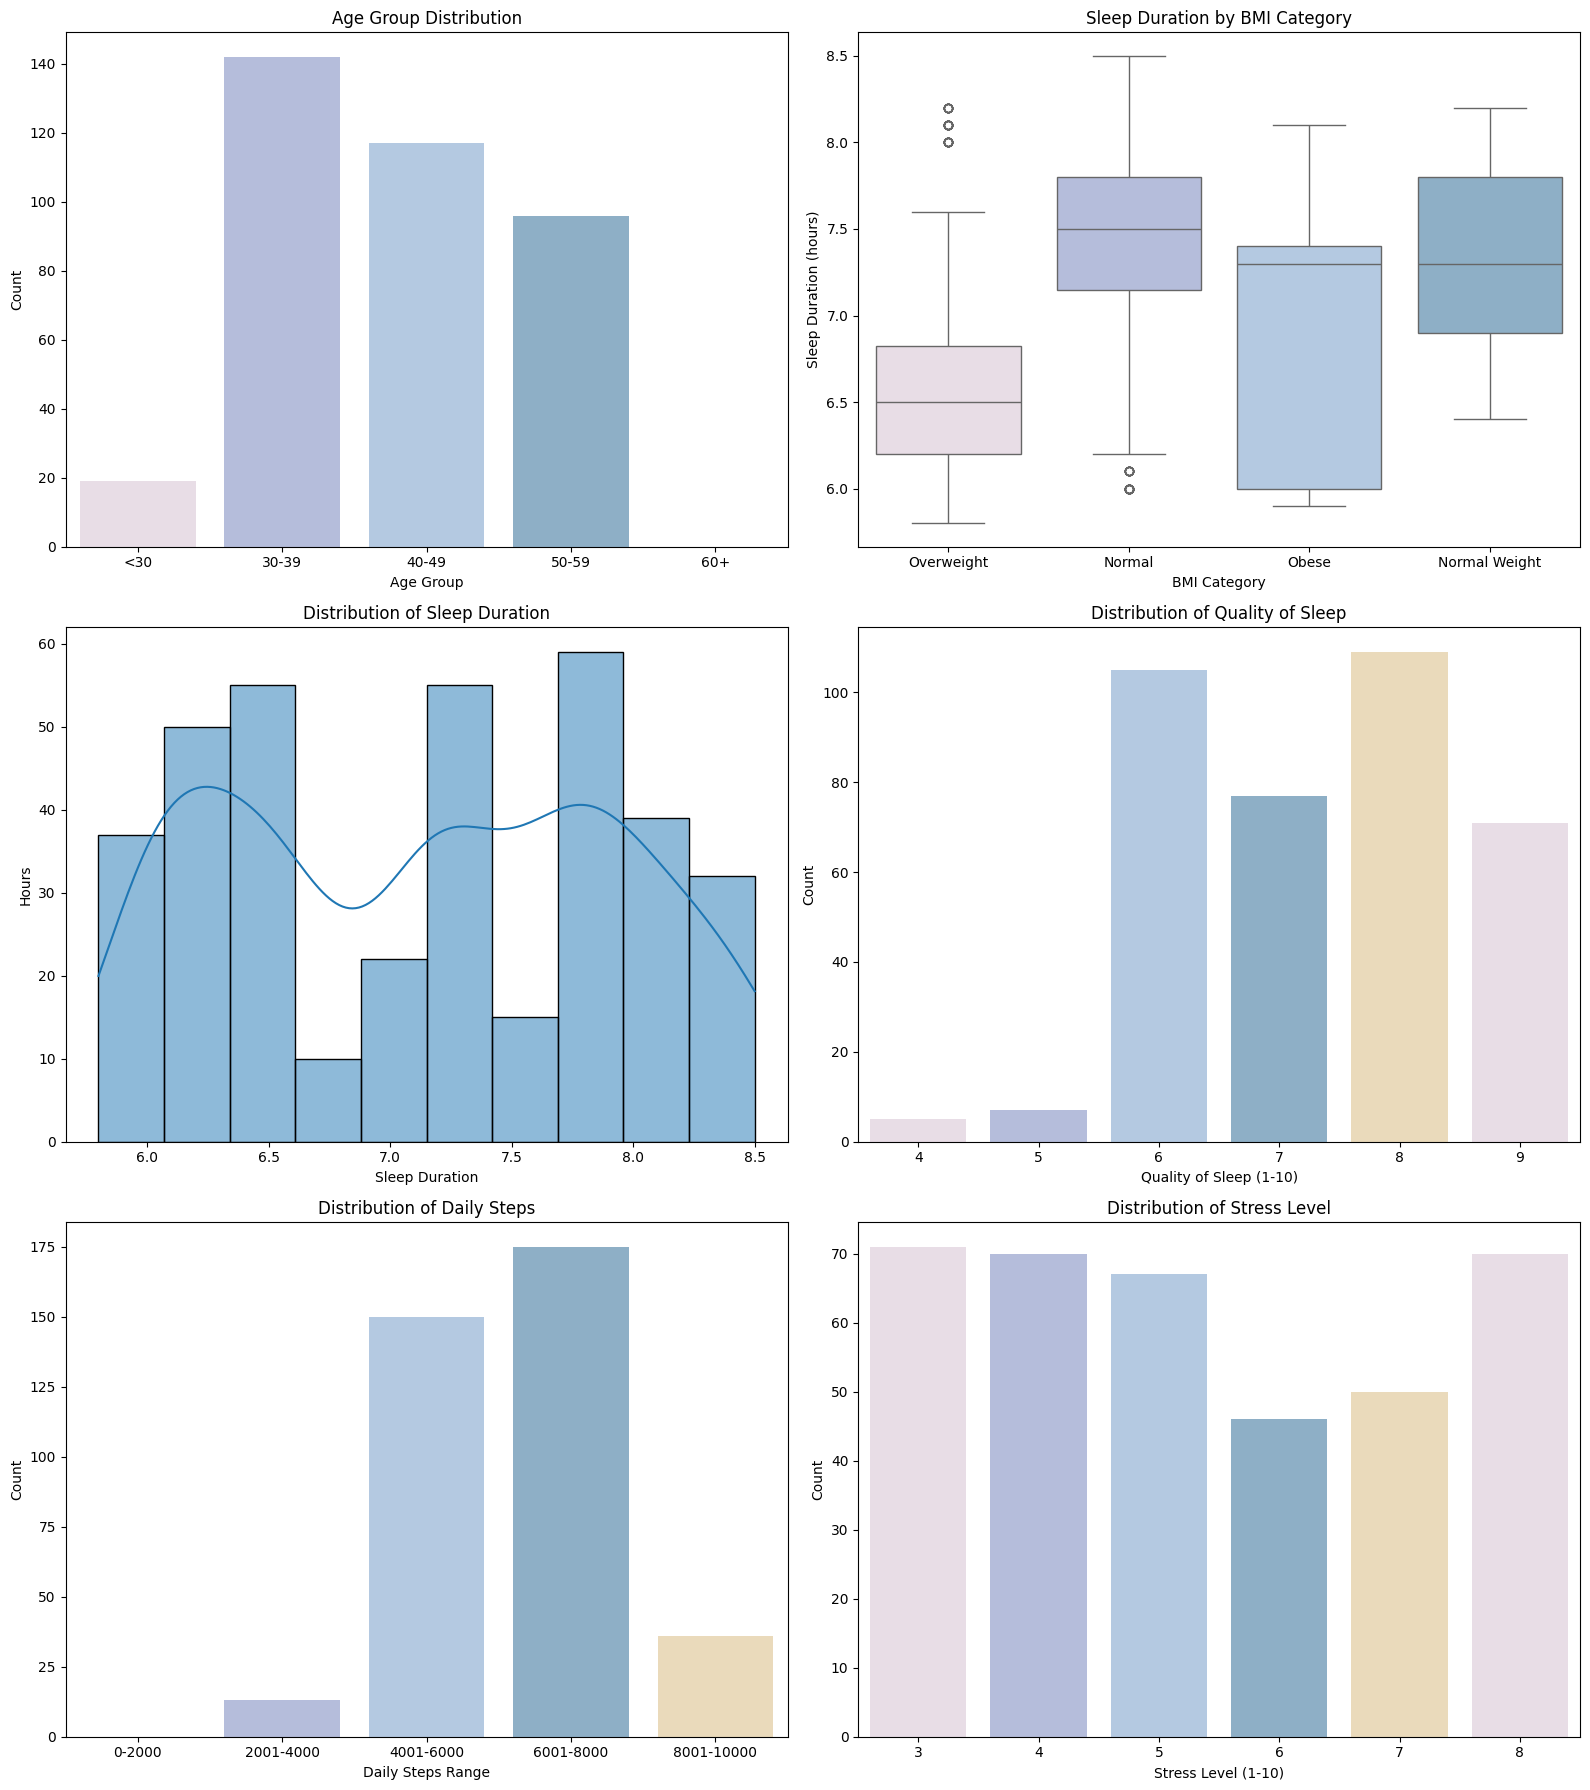

In [73]:
# ------------------------
# 接著畫 6 張圖放在 subplot 中
# ------------------------
fig, axes = plt.subplots(3, 2, figsize=(16, 18))

# 1. Age Group 柱狀圖
age_group_counts = df['Age Group'].value_counts().sort_index()
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, hue=age_group_counts.index,ax=axes[0, 0], palette=colors)

axes[0, 0].set_title('Age Group Distribution')
axes[0, 0].set_xlabel('Age Group')
axes[0, 0].set_ylabel('Count')

# 2. BMI Category vs Sleep Duration Boxplot
sns.boxplot(x='BMI Category', y='Sleep Duration', data=df, ax=axes[0, 1], palette=colors)
axes[0, 1].set_title('Sleep Duration by BMI Category')
axes[0, 1].set_xlabel('BMI Category')
axes[0, 1].set_ylabel('Sleep Duration (hours)')

# 3. Sleep Duration Boxplot
sns.histplot(df['Sleep Duration'], kde=True, bins=10, ax=axes[1,0], palette=colors)
axes[1, 0].set_title('Distribution of Sleep Duration')
axes[1, 0].set_ylabel('Hours')

# 4. Quality of Sleep Boxplot
# sns.boxplot(y=df['Quality of Sleep'], ax=axes[1, 1])
# axes[1, 1].set_title('Distribution of Quality of Sleep')
# axes[1, 1].set_ylabel('Quality Score')

quality_counts = df['Quality of Sleep'].value_counts().sort_index()
sns.barplot(x=quality_counts.index, y=quality_counts.values, hue=quality_counts.index, ax=axes[1, 1], legend=False,palette=colors)
axes[1, 1].set_title('Distribution of Quality of Sleep')
axes[1, 1].set_xlabel('Quality of Sleep (1-10)')
axes[1, 1].set_ylabel('Count')

# 5. Daily Steps Boxplot
# sns.boxplot(y=df['Daily Steps'], ax=axes[2, 0])
# axes[2, 0].set_title('Distribution of Daily Steps')
# axes[2, 0].set_ylabel('Steps')

# 把 Daily Steps 分成5組 (0-2000, 2001-4000, ..., 8001-10000)
bins = [0, 2000, 4000, 6000, 8000, 10000]
labels = ['0-2000', '2001-4000', '4001-6000', '6001-8000', '8001-10000']
df['Daily Steps Group'] = pd.cut(df['Daily Steps'], bins=bins, labels=labels, right=True)
# 計算各區間人數
steps_group_counts = df['Daily Steps Group'].value_counts().sort_index()
sns.barplot(x=steps_group_counts.index, y=steps_group_counts.values, hue=steps_group_counts.index, ax=axes[2, 0], legend=False, palette=colors)
axes[2, 0].set_title('Distribution of Daily Steps')
axes[2, 0].set_xlabel('Daily Steps Range')
axes[2, 0].set_ylabel('Count')


# 6. Physical Activity Level Boxplot
stress_counts = df['Stress Level'].value_counts().sort_index()
sns.barplot(x=stress_counts.index, y=stress_counts.values,  hue=stress_counts.index,ax=axes[2, 1], legend=False, palette=colors)
axes[2, 1].set_title('Distribution of Stress Level')
axes[2, 1].set_xlabel('Stress Level (1-10)')
axes[2, 1].set_ylabel('Count')
# ------------------------
# 整體排版
# ------------------------
plt.tight_layout()
plt.show()
